In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
#engine has the file path
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
#create a base that maps the database for us
Base = automap_base()

# reflect the tables
#give the base the path to the file, and connect them so that the base maps the tables
Base.prepare(autoload_with = engine)

In [6]:
# View all of the classes that automap found
#look for what tables there are -> base.classes.keys() -> ConnectionToDatabase.Classes[MapOfTables].Keys[TableNames]()
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
#create an instance of the Station and Measurement tables which map to the station and measurement tables
#like creating an instance of a dataframe class(object) -> census_df from dataframe object
Station = Base.classes.station

Measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
#open a session
a_session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
#create a query, give it Measurement instance attribute date, order by date, give first instance
recent_date = a_session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date

('2017-08-23',)

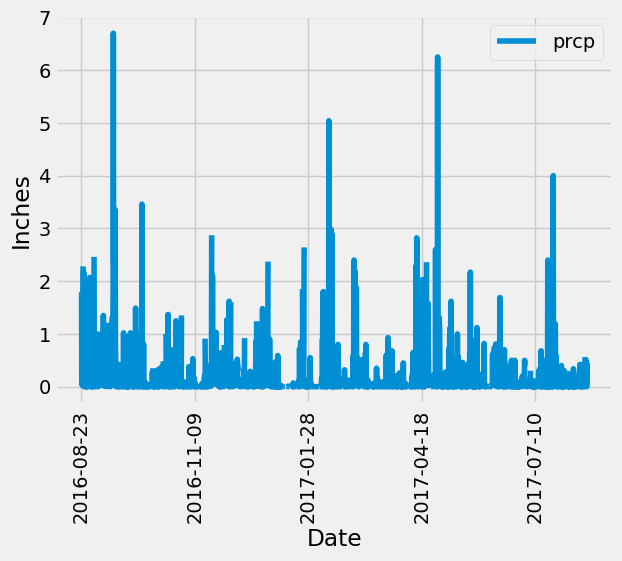

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#get the last 12 months of rows, then plot, one step at a time

# Calculate the date one year from the last date in data set.
#need a timedelta
oneyrpast = dt.date(2017, 8, 23) - dt.timedelta(days = 365)
#print(oneyrpast)

# Perform a query to retrieve the data and precipitation scores
date_prcp_query = a_session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= oneyrpast).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
date_prcp_df = pd.DataFrame(date_prcp_query, columns = ["date", "prcp"])
date_prcp_df

# Sort the dataframe by date
date_prcp_df = date_prcp_df.sort_values(by = "date")

# Use Pandas Plotting with Matplotlib to plot the data
date_prcp_plot = date_prcp_df.plot(kind = "line", x = "date", y = "prcp", xlabel = "Date", ylabel = "Inches", rot = 90)

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_prcp = date_prcp_df["prcp"].describe().to_frame().rename(columns = {"prcp" : "precipitation"})
summary_prcp

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
a_session.query(func.count(Station.id)).all()

[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
a_session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
a_session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == "USC00519281").all()

[(54.0, 85.0, 71.66378066378067)]

<Axes: xlabel='Temperature', ylabel='Frequency'>

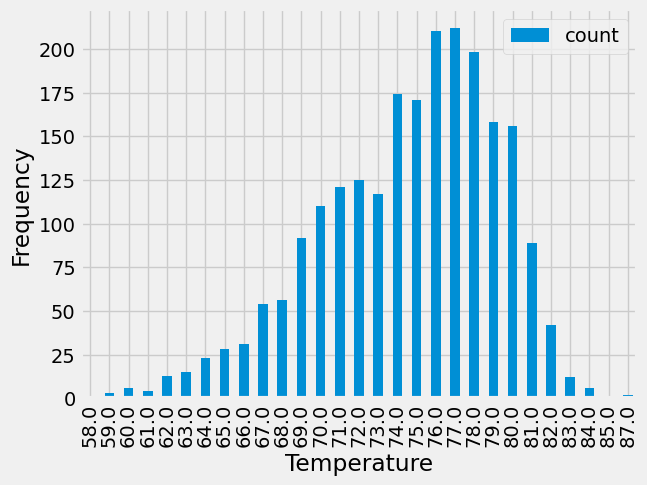

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
#create the query
temp_query = a_session.query(Measurement.tobs, func.count(Measurement.tobs)).group_by(Measurement.tobs).filter(Measurement.date >= oneyrpast).all()

#recieve back a tuple so seperate it out and turn into a list of dictionaries
temp_dict = []
for i in temp_query:
    (temp, count) = i
    temp_dict.append({"temp" : temp, "count" : count})

#plot the dataframe
temp_df = pd.DataFrame(temp_dict)
temp_df.plot(kind = "bar", x = "temp", y = "count", xlabel = "Temperature", ylabel = "Frequency")


# Close Session

In [16]:
# Close Session
a_session.close()